In [5]:
using Distributions,SpecialFunctions,Random,Plots,StatsPlots

Q1


Standard Cauchy Distribution is $\frac{1}{\pi(1+x^2)}\\$
Let us consider our proposal function G to Normal($\mu,\sigma$)=$\frac{\exp^{\frac{-(x-\mu)^2}{2\sigma^2}}}{\sqrt{2\pi}\sigma}\\$

We know that if $sup\frac{\pi(x)}{g(x)}$ is finite then Variance of $\hat{\theta_g}$ is also finite $\\$
$$\implies sup\frac{c\exp^{\frac{-(x-\mu)^2}{2\sigma^2}}}{1+x^2} $$ 
So, We can see as $\ X \to \infty \implies \frac{\pi(x)}{g(x)} \to \infty \\$

But, the above is a sufficient condition not necessary one, Hence we can't conclude that variance is infinte.

So, let us consider the variance with Normal(0,$\sigma^2$)
$$\implies[ \int_{-\infty}^{\infty} h(x)^2f(x)^2/g(x) dx ]\\$$
$$\implies \frac{1}{\pi^2}[ \int_{-\infty}^{\infty} \frac{x^2}{1+x^4}N(0,\sigma^2) dx]\\$$ 
$$\implies c[ \int_{-\infty}^{\infty} \frac{x^2\exp^{\frac{x^2}{2\sigma^2}}}{1+x^4} dx]\\$$

But, since this integral doesn't exist, Hence the Variance is infinite.




Q2


Q3


In [58]:
Random.seed!(1)
arr=[]
function create_y(v)##Function to generate yi's
    arr=[]
    c=1
    for i in 1:50
        x=rand(TDist(v))
        push!(arr,x)
    end
    return arr    
end


create_y (generic function with 2 methods)

In [59]:
##Function to generate the target distribution
function target(x,v)
    distr=exp(-(x*x)/2)
    for i in 1:50
        distr*=(1+((arr_y[i]-x)^2)/v)^(-(v+1)/2)
    end
    return distr    
end        


target (generic function with 3 methods)

In [60]:
function nor(x)
    val=exp(-(x*x)/2)/(2*pi)^(1/2)
    return val
end    

nor (generic function with 1 method)

In [72]:
function weighted_importance(n::Number,v::Number)##Function to estimate the first moment 
    num=0
    deno=0
    for i in 1:n
        x=rand(Normal(0,1))
        num+=(x)*(target(x,v))/nor(x)
        deno+=(target(x,v)/nor(x))
    end
    esti=(num)/(deno) 
    #print(esti)
    return esti
end       


weighted_importance (generic function with 3 methods)

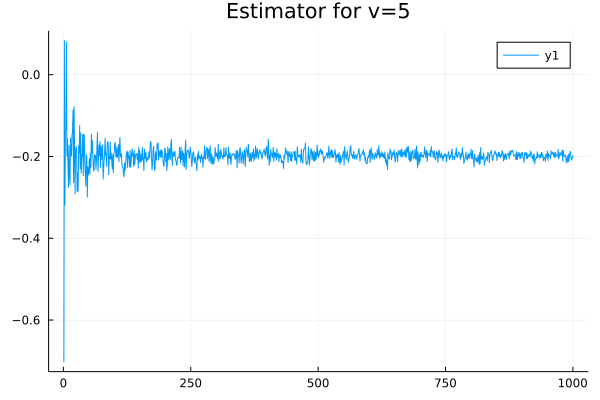

In [76]:
#Calculating and plotting the estimator as N increases for v=5
sample=[]
global arr_y=create_y(5)
for n in 1:1000
    x=weighted_importance(n,5)
    push!(sample,x)
end
plot(sample,title="Estimator for v=5")    
    

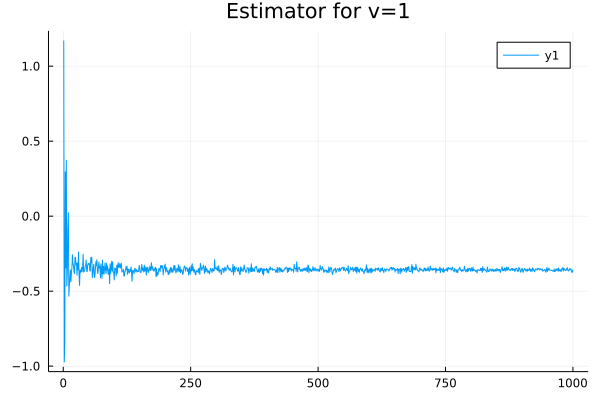

In [78]:
#Calculating and plotting the estimator as N increases for v=1
global arr_y=create_y(1)
sample=[]
for i in 1:1000
    x=weighted_importance(i,1)
    push!(sample,x)
end
plot(sample,title="Estimator for v=1")    

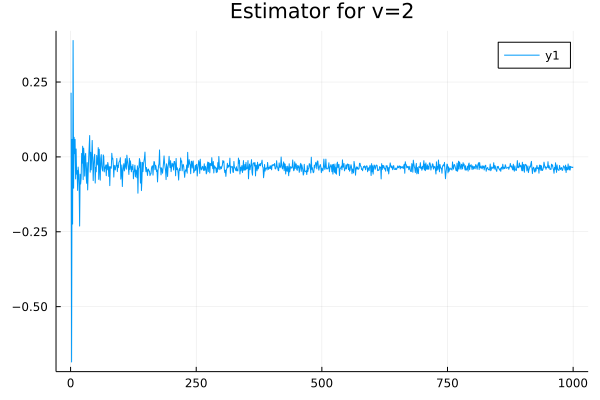

In [79]:
#Calculating and plotting the estimator as N increases for v=2
global arr_y=create_y(2)
sample=[]
for i in 1:1000
    x=weighted_importance(i,2)
    push!(sample,x)
end
plot(sample,title="Estimator for v=2")


Q4

Posterior distribution of $\lambda =$
$$ \frac{P({y_i}|\lambda,\alpha,\beta)\cdot(\lambda|\alpha,\beta)}{[ \int_{-\infty}^{\infty} P({y_i}|\lambda,\alpha,\beta)\cdot(\lambda|\alpha,\beta) \,d\lambda ]} \\$$

The Deniminator integrates outs to 1 and the numerator is =
$$ e^{(-n\lambda)}\cdot\lambda^{(\sum y_i)}\cdot\lambda^{(\alpha-1)}\cdot e^{(-\beta\lambda)}\\$$


Grouping the like terms and  comparing it with Gamma  we get the posterior distribution is $$ gamma\left(\sum y_i +\alpha, n+\beta\right) $$